<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# **2. Aprendizado Supervisionado e Regressão Linear**
---



Após fazer os exercícios deste laboratório responda ao **questionário correspondente da aula no Moodle**.



# Caso: **Estimando a emissão de gases CO2 de veículos**

Neste Lab você vai empregar modelos de regressão simples e múltipla para estimar as emissões de CO2 de veículos a partir de suas características como consumo de combustível, marca ou tamanho do motor.

Dados: https://meusite.mackenzie.br/rogerio/TIC/FuelConsumptionCo2.csv

# Acesse e Explore os dados.

Acesse e explore os dados antes de contruir os seus modelos. Verifique as quantidades e tipos de dados envolvidos, a qualidade dos dados etc. é fundamental conhecer os dados antes de se construir modelos sobre eles.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("https://meusite.mackenzie.br/rogerio/TIC/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.dtypes


MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

# Faça um gráfico de dispersão entre todos os pares de variáveis

Isso irá permitir você visualizar as relações de cada par de variáveis dos dados.

**Dica**: Empregue `sns.pairplot(df)`



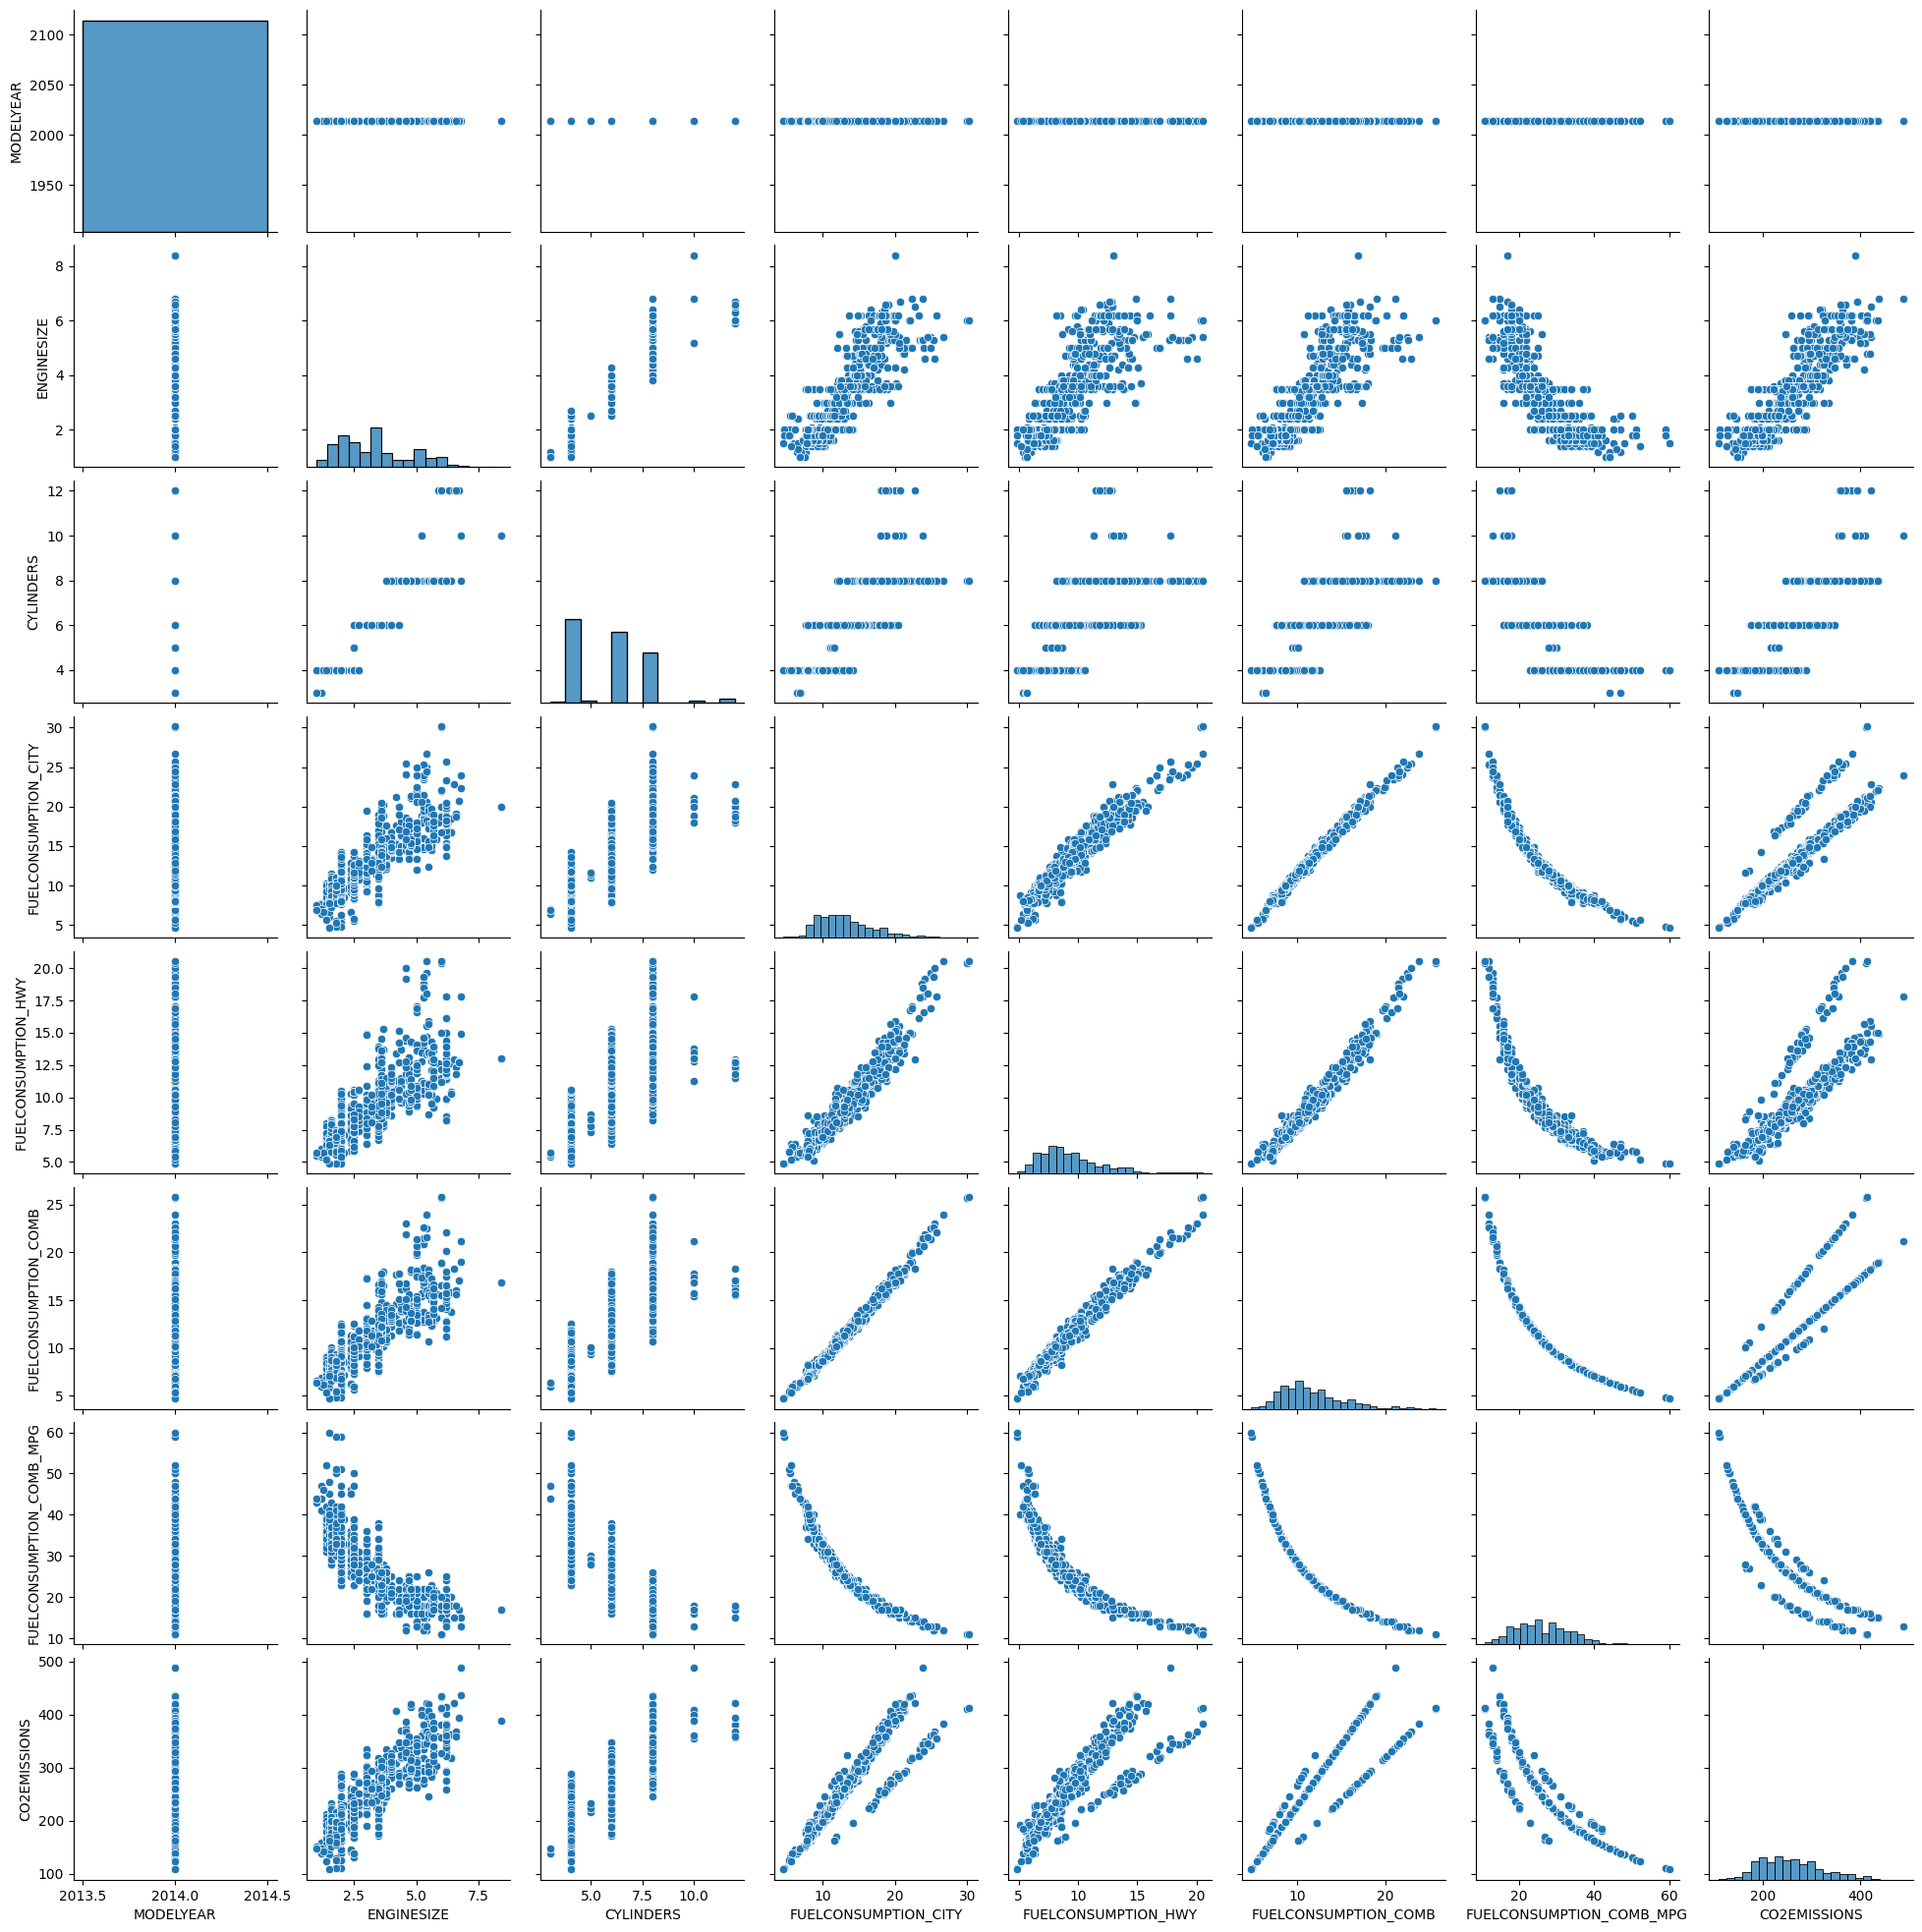

In [8]:
sns.pairplot(df)
plt.show()


# Modelo Regressão Simples

Crie um modelo de regressão simples para estimar valores `CO2EMISSIONS` com base nos dados de consumo combinado dos veículos `FUELCONSUMPTION_COMB`. Encontre os coeficientes, seus p-values, e o R2 do modelo.


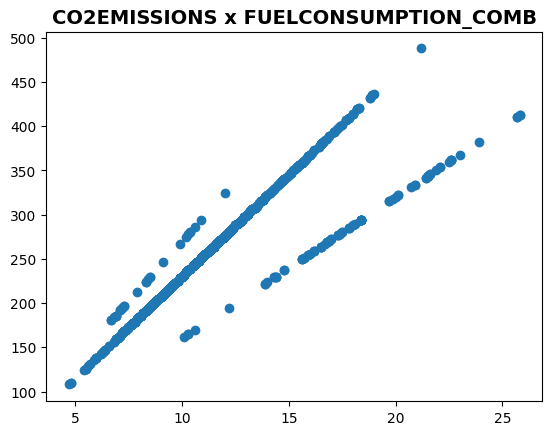

In [15]:
plt.scatter(df['FUELCONSUMPTION_COMB'],df['CO2EMISSIONS'])

plt.title('CO2EMISSIONS x FUELCONSUMPTION_COMB',fontsize=14,weight='bold')
plt.show()

In [11]:
import statsmodels.formula.api as sm


In [16]:
#definição do modelo
lm = sm.ols(formula='CO2EMISSIONS ~ FUELCONSUMPTION_COMB', data=df)

#treinamento
lm=lm.fit()

#resultado
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     4153.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        04:26:18   Log-Likelihood:                -5092.7
No. Observations:                1067   AIC:                         1.019e+04
Df Residuals:                    1065   BIC:                         1.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               68.3871 

# Predição
A partir do seu modelo empregue a função `result.predict(x)` para estimar a emissão de gases por veículos que apresentam consumo de combustível com valores 4 e 28.




**O2EMISSIONS = 68.3871 + 16.2200 x FUELCONSUMPTION_COMB**

**R2 = 0.796 > 0.7**

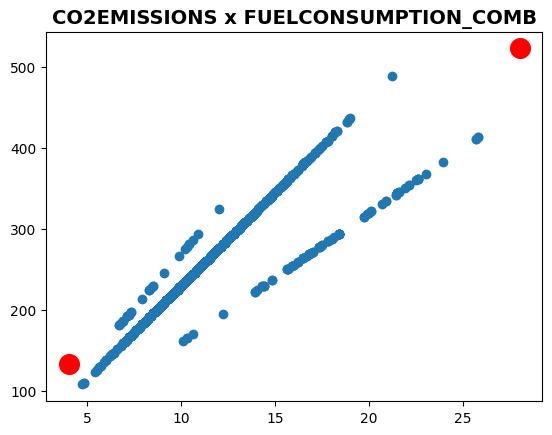

,FUELCONSUMPTION_COMB,Estimate CO2EMISSIONS
0,4,133.267015
1,28,522.546301


In [18]:
new_data = pd.DataFrame({'FUELCONSUMPTION_COMB':[4, 28]})
estimated_values = lm.predict(new_data)

plt.scatter(df['FUELCONSUMPTION_COMB'],df['CO2EMISSIONS'])

plt.scatter(new_data, estimated_values, s=200, c='r')

plt.title('CO2EMISSIONS x FUELCONSUMPTION_COMB',fontsize=14,weight='bold')
plt.show()

new_data['Estimate CO2EMISSIONS'] = estimated_values
display(new_data)

# Regressão Múltipla

Faça agora um modelo de regressão múltipla para estimar as emissões de CO2 a partir de `FUELCONSUMPTION_COMB` e `ENGINESIZE`. Em seguida faça a predição de emissões para um veículo com `FUELCONSUMPTION_COMB` = 10 e `ENGINESIZE` = 2.

**CO2EMISSIONS = a0 + a1 x FUELCONSUMPTION_COMB + a2 x ENGINESIZE**

In [19]:
#definição do modelo
lm = sm.ols(formula='CO2EMISSIONS ~ FUELCONSUMPTION_COMB + ENGINESIZE', data=df)

#treinamento
lm=lm.fit()

#resultados
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     3220.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        04:49:12   Log-Likelihood:                -4898.4
No. Observations:                1067   AIC:                             9803.
Df Residuals:                    1064   BIC:                             9818.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               78.3068 

**O2EMISSIONS = 78.3068 + 9.7300 x FUELCONSUMPTION_COMB + 19.4963 x ENGINESIZE**

**R2 = 0.858 > 0.8**

In [20]:
new_data = pd.DataFrame({'FUELCONSUMPTION_COMB':[10], 'ENGINESIZE':[2]})
estimated_values = lm.predict(new_data)

new_data['Estimate CO2EMISSIONS'] = estimated_values
display(new_data)

,FUELCONSUMPTION_COMB,ENGINESIZE,Estimate CO2EMISSIONS
0,10,2,214.598964


# Regressão com Atributos Categóricos

Faça agora um modelo de Regressão Múltipla adicionando o atributo categórico `VEHICLECLASS` ao modelo anterior. Sendo um atributo categórico o `statsmodel` fará automaticamente o *hot encode* desse atributo (o *hot encode* é uma importante técnica para tornar numérico atributos categóricos e é importante para uma série de modelos que requerem dados numéricos como a regressão. Se você não conhece, pesquise ou pergunte ao professor sobre esta transformação).



In [ ]:
import statsmodels.formula.api as sm
model = sm.ols(formula='CO2EMISSIONS ~ FUELCONSUMPTION_COMB + ENGINESIZE + VEHICLECLASS', data=df)

result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     414.5
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:31:22   Log-Likelihood:                -4850.3
No. Observations:                1067   AIC:                             9737.
Df Residuals:                    1049   BIC:                             9826.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
result.params

Intercept                                   85.154742
VEHICLECLASS[T.FULL-SIZE]                   -1.177255
VEHICLECLASS[T.MID-SIZE]                    -4.589137
VEHICLECLASS[T.MINICOMPACT]                  0.737737
VEHICLECLASS[T.MINIVAN]                      0.870664
VEHICLECLASS[T.PICKUP TRUCK - SMALL]        27.164208
VEHICLECLASS[T.PICKUP TRUCK - STANDARD]      1.490240
VEHICLECLASS[T.SPECIAL PURPOSE VEHICLE]     18.117114
VEHICLECLASS[T.STATION WAGON - MID-SIZE]    -5.824881
VEHICLECLASS[T.STATION WAGON - SMALL]        7.469977
VEHICLECLASS[T.SUBCOMPACT]                   7.622019
VEHICLECLASS[T.SUV - SMALL]                 11.451534
VEHICLECLASS[T.SUV - STANDARD]               9.910910
VEHICLECLASS[T.TWO-SEATER]                  10.329937
VEHICLECLASS[T.VAN - CARGO]                 13.088594
VEHICLECLASS[T.VAN - PASSENGER]             33.028659
FUELCONSUMPTION_COMB                         8.083254
ENGINESIZE                                  21.719247
dtype: float64

In [ ]:
result.params.index

Index(['Intercept', 'VEHICLECLASS[T.FULL-SIZE]', 'VEHICLECLASS[T.MID-SIZE]',
       'VEHICLECLASS[T.MINICOMPACT]', 'VEHICLECLASS[T.MINIVAN]',
       'VEHICLECLASS[T.PICKUP TRUCK - SMALL]',
       'VEHICLECLASS[T.PICKUP TRUCK - STANDARD]',
       'VEHICLECLASS[T.SPECIAL PURPOSE VEHICLE]',
       'VEHICLECLASS[T.STATION WAGON - MID-SIZE]',
       'VEHICLECLASS[T.STATION WAGON - SMALL]', 'VEHICLECLASS[T.SUBCOMPACT]',
       'VEHICLECLASS[T.SUV - SMALL]', 'VEHICLECLASS[T.SUV - STANDARD]',
       'VEHICLECLASS[T.TWO-SEATER]', 'VEHICLECLASS[T.VAN - CARGO]',
       'VEHICLECLASS[T.VAN - PASSENGER]', 'FUELCONSUMPTION_COMB',
       'ENGINESIZE'],
      dtype='object')

O modelo acima é ainda melhor que os modelos anteriores. Ele apresenta, além do R2, um R2-Ajustado melhor (que inclui uma penalidade para o aumento do número de variáveis preditoras).